<a href="https://colab.research.google.com/github/dataskeptic/similarities/blob/main/tf_idf__biology_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pt_core_news_lg

2023-08-09 13:48:06.979102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 13:48:08.795938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.1 MB/s eta 0:00:00


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import spacy
nlp = spacy.load('pt_core_news_lg')

In [ ]:
from spellchecker import SpellChecker

In [ ]:
def to_lowercase(data):
    return [line.replace(line, line.lower()) for line in data]

def remove_stopwords(data):
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    filtered_tokens = []

    for line in data:
        # tokenize the line with spaCy
        doc = nlp(line)

        # remove stopwords from the doc
        filtered_tokens_line = [token.text for token in doc if token.text.lower() not in stop_words]

        # join the remaining tokens back into a single string
        filtered_line = ' '.join(filtered_tokens_line)

        filtered_tokens.append(filtered_line)

    return filtered_tokens

def remove_punct(data):
    #regex para tudo que não for [A-Za-Z0-9] e espaçamento
    return [re.sub(r'[^\w\s]', ' ', str(line)) for line in data]


def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    lem_tokens = []
    for line in data:
        tokens = word_tokenize(line, language='portuguese')
        lem_line = []
        for token in tokens:
            lem_token = lemmatizer.lemmatize(token)
            lem_line.append(lem_token)
        lem_string = ' '.join(lem_line)
        lem_tokens.append(lem_string)
    return lem_tokens

def spell_checker(text):
    spell = SpellChecker(language='pt')
    words = text.split()
    corrected_text = []
    for word in words:
        if isinstance(word, str):
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                corrected_text.append(word)
    return ' '.join(corrected_text)

def stem(data):
    stemmer = SnowballStemmer('portuguese')
    stem_tokens = []
    for line in data:
        tokens = word_tokenize(line, language='portuguese')
        stem_line = []
        for token in tokens:
            stem_token = stemmer.stem(token)
            stem_line.append(stem_token)
        stem_string = ' '.join(stem_line)
        stem_tokens.append(stem_string)
    return stem_tokens

def preprocess_text(data):

    data = remove_punct(data)
    data = to_lowercase(data)
    data = remove_stopwords(data)
    #data = lemmatize(data)
    #data = [spell_checker(line) for line in data]
    data = stem(data)

    return data

In [ ]:
reference_answers.to_csv("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_reference_answers.csv")
student_answers.to_excel("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_student_answers_and_grades_clean.xlsx")

NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

path_reference_answers = "drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/reference_answers.csv"
path_student_answers = "drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/student_answers_and_grades_clean.xlsx"

reference_answers = pd.read_csv(path_reference_answers)
student_answers = pd.read_excel(path_student_answers)

print(reference_answers)
print("---------------------------------------")
print(student_answers)

    question_id                                        refans_text
0            36  A célula animal e vegetal apresentam formato d...
1            36  A parede celular é uma estrutura exclusiva das...
2            36  Nos vegetais, a célula apresenta, além da memb...
3            37  MEMBRANA PLASMÁTICA: O envelope externo da cél...
4            37  As células têm muitas partes, cada uma com uma...
5            37  A célula  é constituída de membrana celular, c...
6            38  O tecido epitelial apresenta as seguintes cara...
7            38  O tecido epitelial apresenta como característi...
8            38  O tecido epitelial é o responsável por revesti...
9            39  O metabolismo celular é um conjunto de reações...
10           39  Conjunto de todas as reações químicas que ocor...
11           39  O metabolismo celular permite que todas as cél...
12           40  O fenótipo corresponde às características físi...
13           40  O fenótipo pode ser alterado (pelo o ambiente

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

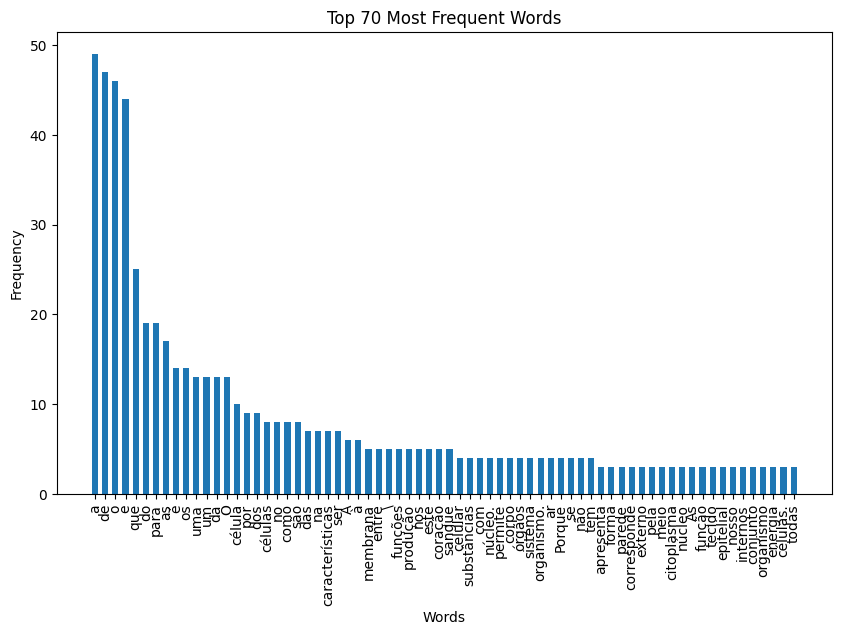

In [ ]:
all_words = [word for tokens in reference_answers['refans_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
reference_answers['refans_preprocess'] = preprocess_text(reference_answers['refans_text'])

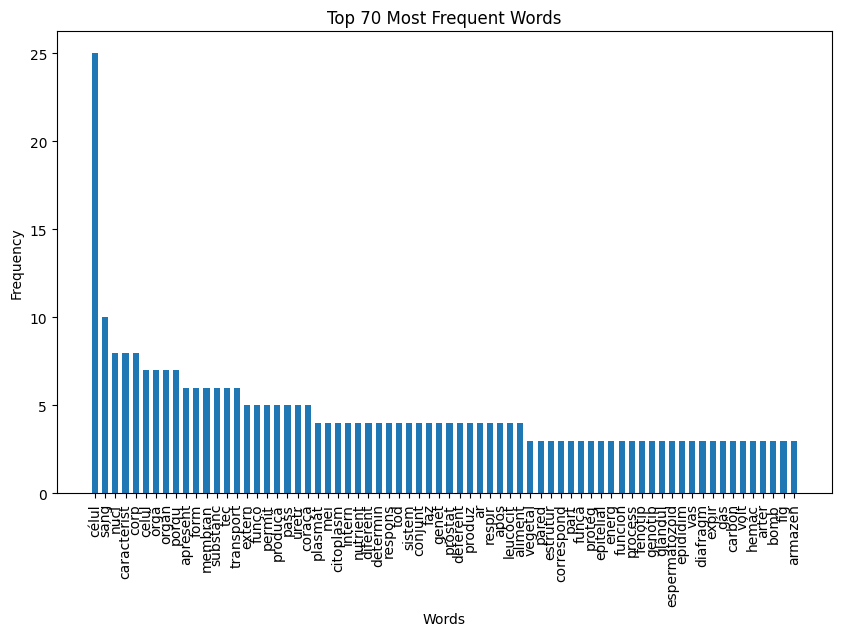

In [ ]:
all_words = [word for tokens in reference_answers['refans_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

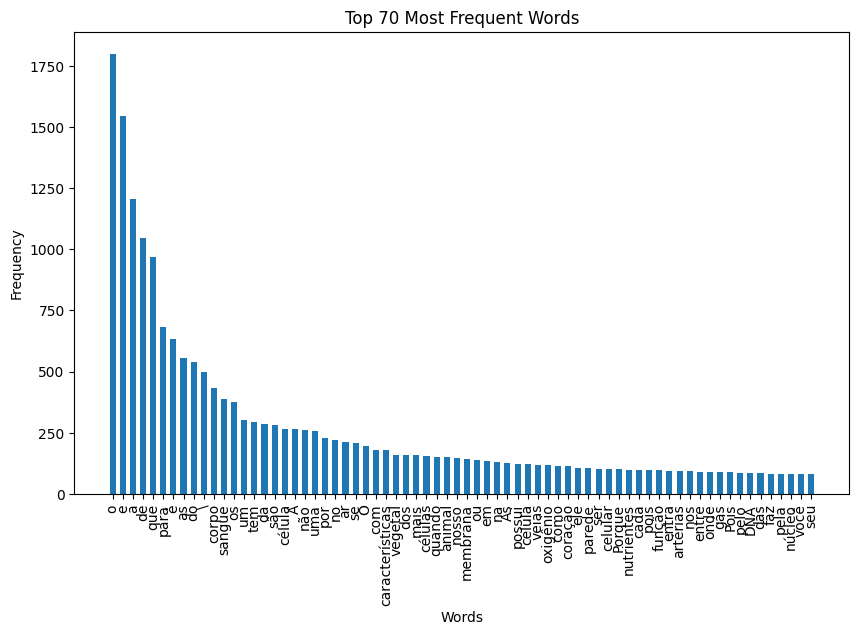

In [ ]:
all_words = [word for tokens in student_answers['answer_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
student_answers['answer_preprocess'] = preprocess_text(student_answers['answer_text'])

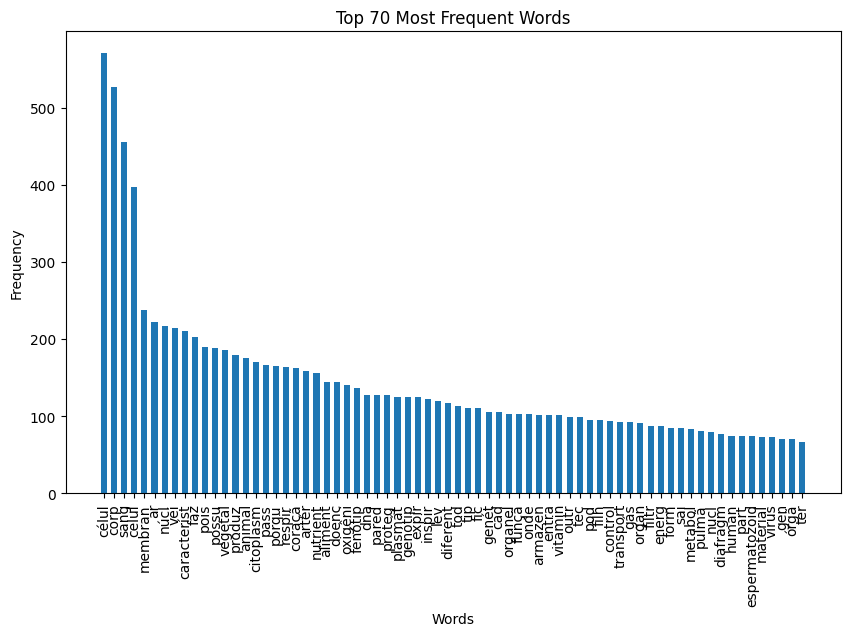

In [ ]:
all_words = [word for tokens in student_answers['answer_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_vectorizer = CountVectorizer()

In [ ]:
# Assuming tfidf_cosine_similarity is a list
tfidf_cosine_similarity = [0.8, 0.7, 0.9, 0.6, 0.85]

# Calculate the mean of the values in tfidf_cosine_similarity
mean_similarity = np.mean(tfidf_cosine_similarity)

print("Mean similarity:", mean_similarity)

Mean similarity: 0.77


In [ ]:
tf_tfidf_similarities = pd.DataFrame()

for questionId in range(36, 51):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tf = tf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())

  for index, row in temp_student_answers.iterrows():
    temp_answer_tfidf = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])
    temp_answer_tf = tf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])

    tfidf_cosine_similarity = ([(cosine_similarity(temp_answer_tfidf, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    tf_cosine_similarity = ([(cosine_similarity(temp_answer_tf, ref_tf)[0][0]) for ref_tf in refans_tf])
    print(type(tf_cosine_similarity))
    tfidf_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)
    tf_similarities = max(tf_cosine_similarity), np.mean(tf_cosine_similarity), np.median(tf_cosine_similarity), min(tf_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = tfidf_similarities
    temp_student_answers.loc[index, ('max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf')] = tf_similarities

  tf_tfidf_similarities = pd.concat([tf_tfidf_similarities, temp_student_answers])
print(tf_tfidf_similarities)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [ ]:
mean_cosine = tf_tfidf_similarities['max_cosine_tf'].mean()
max_cosine = tf_tfidf_similarities['max_cosine_tf'].max()
median_cosine = tf_tfidf_similarities['max_cosine_tf'].median()
std_cosine =  tf_tfidf_similarities['max_cosine_tf'].std()


print(mean_cosine, std_cosine, mean_cosine + std_cosine, max_cosine, median_cosine)


0.3811239453944259 0.23634166954531222 0.6174656149397382 1.0000000000000004 0.4082482904638631


In [ ]:
def similarity_to_score(similarity):
    if similarity <= 0.30:
        score = 0
    elif similarity < 0.45:
        score = 1
    elif similarity < 0.60:
        score = 2
    else:
        score = 3
    return score

tf_tfidf_similarities[['max_grade_tfidf', 'mean_grade_tfidf', 'median_grade_tfidf', 'min_grade_tfidf']] = tf_tfidf_similarities[['max_cosine_tfidf','mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf']].applymap(similarity_to_score)

In [ ]:
tf_tfidf_similarities.to_csv('drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/tf_idf_similarities.csv', index=False)

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
Kappa_max = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['max_grade_tfidf'])
Kappa_mean = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['mean_grade_tfidf'])
Kappa_median = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['median_grade_tfidf'])
Kappa_min = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['min_grade_tfidf'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.18783326936674338
Mean Cohen's Kappa: 0.11461396956447611
Median Cohen's Kappa: 0.11369783732819971
Min Cohen's Kappa: 0.030360479027956022


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result

tfidf_similarity['max_grade_tfidf'].apply(count_result)
print(zero, um, dois, tres)

1130 844 808 184


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result

tfidf_similarity['grade'].apply(count_result)
print(zero, um, dois, tres)

1083 844 632 407
